# Watch a temperature : scan temperature *v* time

*APS Training for Bluesky Data Acquisition*.

**Objective**

Measure the temperature for a short period and compute basics measures of the collected readings.

## Start the `instrument` package

In [1]:
from instrument.collection import *

I Sun-14:14:39 - ############################################################ startup
I Sun-14:14:39 - logging started
I Sun-14:14:39 - logging level = 10
I Sun-14:14:39 - /home/apsu/bluesky/instrument/collection.py
I Sun-14:14:39 - /home/apsu/bluesky/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/apsu/bluesky/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Sun-14:14:39 - /home/apsu/bluesky/instrument/iocs/check_iocs.py
I Sun-14:14:39 - EPICS IOCs ready...


cannot connect to IOC:float1.NAME


I Sun-14:14:40 - EPICS registers IOC not running.  Starting now...
 6238.IOC_registers (04/11/2021 02:14:40 PM) (Detached) 1 Socket in /run/screen/S-apsu.
D Sun-14:14:40 - registers IOC started
I Sun-14:14:40 - There is a screen on:
	6238.IOC_registers	(04/11/2021 02:14:40 PM)	(Detached)
1 Socket in /run/screen/S-apsu.
I Sun-14:14:40 - #### Bluesky Framework ####
I Sun-14:14:41 - /home/apsu/bluesky/instrument/framework/check_python.py
I Sun-14:14:41 - /home/apsu/bluesky/instrument/framework/check_bluesky.py
I Sun-14:14:41 - /home/apsu/bluesky/instrument/framework/initialize.py
I Sun-14:14:42 - using databroker catalog 'training'
I Sun-14:14:42 - /home/apsu/bluesky/instrument/framework/metadata.py
I Sun-14:14:42 - #### Devices ####
I Sun-14:14:42 - /home/apsu/bluesky/instrument/devices/area_detector.py
I Sun-14:14:42 - /home/apsu/bluesky/instrument/devices/calculation_records.py
I Sun-14:14:46 - /home/apsu/bluesky/instrument/devices/ioc_stats.py
I Sun-14:14:46 - /home/apsu/bluesky/instr

Add the name of this notebook as metadata to every run.  This is done by adding to the RunEngine's metadata dictionary (`RE.md`), content that will be added to the *start* document of every run.  The metadata is useful documentation about a run and can be used for several purposes, such as to record a general condition (such as the name of this notebook) or to identify these runs from a database search.

In [2]:
RE.md["notebook"] = "watch_temperature"

## Describe

Note the initial settings of the `temperature` (controller).  It's actually an EPICS *swait* record that simulates a temperature sensor and controller.  It has a setpoint, a readback, and a few other support attributes as shown.  A Random noise level is part of the simulation.  We'll compute that noise level from the standard deviation of the measurements.

In [3]:
listdevice(temperature)

==================== ===== ==========================
name                 value timestamp                 
==================== ===== ==========================
temperature_setpoint 25.0  2021-04-11 14:14:48.174188
temperature          25.0  2021-04-11 14:14:48.174510
==================== ===== ==========================



## Read

The `temperature` setpoint can be used just as if it was a motor (it is based on the [`ophyd.PVPositioner`](https://blueskyproject.io/ophyd/positioners.html?highlight=pvpositioner#pvpositioner).  The simulator includes both noise and a limited ramp rate.  A move of more than a couple degrees will take a measureable time, simulating a physical system.

Get the current temperature.

In [4]:
print(f"{temperature.position = }")

temperature.position = 25.0


Use the `.read()` method to get the data

In [5]:
temperature.read()

OrderedDict([('temperature_setpoint',
              {'value': 25.0, 'timestamp': 1618168488.174188}),
             ('temperature', {'value': 25.0, 'timestamp': 1618168488.17451})])

## Move

Change the temperature by 10 degrees (and measure how long this took).  Use the *relative* move magic command: `%movr`

In [6]:
import time
t0 = time.time()
%movr temperature 10
print(f"{time.time()-t0 = :.3f} s")
print(f"{temperature.position = }")


temperature:  24%|██████                   | 2.439/10.0 [00:01<00:05,  1.32C/s]
temperature:  47%|███████████▊             | 4.718/10.0 [00:03<00:04,  1.22C/s]
temperature:  72%|█████████████████▉       | 7.173/10.0 [00:05<00:02,  1.22C/s]
temperature:  92%|███████████████████████  | 9.218/10.0 [00:07<00:00,  1.17C/s]
temperature [In progress. No progress bar available.]                          
                                                                               
time.time()-t0 = 7.863 s
temperature.position = 34.217914091706724


## Count
Use the bluesky RunEngine, `RE`, and a standard plan, `bp.count()`, to count the temperature.

In [7]:
RE(bp.count([temperature]))



Transient Scan ID: 28     Time: 2021-04-11 14:14:56
Persistent Unique Scan ID: '06928566-0151-4f0e-9049-64a87429774d'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 14:14:56.7 |             35.00000 |    34.21791 |
+-----------+------------+----------------------+-------------+
generator count ['06928566'] (scan num: 28)


('06928566-0151-4f0e-9049-64a87429774d',)

Take ten readings by adding the `num=10` keyword argument (a.k.a. *kwarg*).



Transient Scan ID: 29     Time: 2021-04-11 14:14:56
Persistent Unique Scan ID: '12641c82-b781-48fc-9045-303c6ba1f831'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 14:14:57.4 |             35.00000 |    34.21791 |
|         2 | 14:14:57.5 |             35.00000 |    34.21791 |
|         3 | 14:14:57.6 |             35.00000 |    34.21791 |
|         4 | 14:14:57.7 |             35.00000 |    34.21791 |
|         5 | 14:14:57.9 |             35.00000 |    34.21791 |
|         6 | 14:14:58.0 |             35.00000 |    34.21791 |
|         7 | 14:14:58.1 |             35.00000 |    34.21791 |
|         8 | 14:14:58.2 |             35.00000 |    34.61569 |
|         9 | 14:14:58.3 |             35.00000 |    34.61569 |
|        10 | 14:14:58.4 |             35.00000 |    34.61569 |
+--

('12641c82-b781-48fc-9045-303c6ba1f831',)

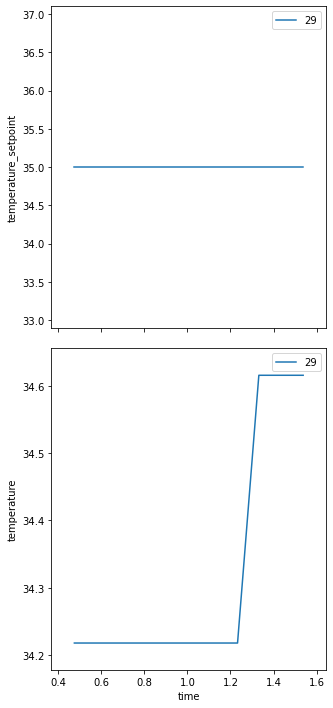

In [8]:
RE(bp.count([temperature], num=10))

Do all the readings look the same?  Perhaps there are only two different values (first one, then the other)?  That's because our measurements were only *reading* the temperature without waiting for it to update.  (If there are two different values, we caught the moment when EPICS updated the calculation.)  The table above showed `temperature_scanning_rate 5` which means EPICS is only updating every 2 seconds.

In [9]:
temperature.scanning_rate.get(as_string=True)

'2 second'

## Adjust the measurement interval
We need to slow down the measurement to this interval by adding the `delay=2` kwarg, sampling every 2 seconds.



Transient Scan ID: 30     Time: 2021-04-11 14:14:58
Persistent Unique Scan ID: '7a182662-db79-466e-8858-d2bc7bd974b0'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 14:14:59.3 |             35.00000 |    34.61569 |
|         2 | 14:15:01.2 |             35.00000 |    34.87310 |
|         3 | 14:15:03.2 |             35.00000 |    35.03571 |
|         4 | 14:15:05.2 |             35.00000 |    34.76296 |
|         5 | 14:15:07.2 |             35.00000 |    35.18986 |
|         6 | 14:15:09.2 |             35.00000 |    35.38403 |
|         7 | 14:15:11.3 |             35.00000 |    35.28712 |
|         8 | 14:15:13.3 |             35.00000 |    35.13824 |
|         9 | 14:15:15.3 |             35.00000 |    34.64585 |
|        10 | 14:15:17.3 |             35.00000 |    34.99879 |
+--

('7a182662-db79-466e-8858-d2bc7bd974b0',)

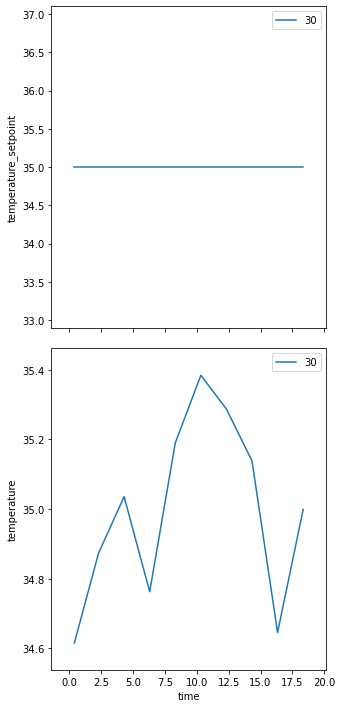

In [10]:
RE(bp.count([temperature], num=10, delay=2))

Let's reduce the update interval that EPICS uses, to the shortest interval EPICS provides, so our measurements do not take so long.

In [11]:
# print the list of possible values
print(temperature.scanning_rate.enum_strs)

# set the shortest interval, by name
temperature.scanning_rate.put(".1 second")
temperature.scanning_rate.get(as_string=True)

('Passive', 'Event', 'I/O Intr', '10 second', '5 second', '2 second', '1 second', '.5 second', '.2 second', '.1 second')


'.1 second'

## Collect our measurements
Repeat the measurement, this time with more observations.

Also, we'll add a metadata key:value pair so that later we can find this data more easily in the database.  Most plans take a `md={}` kwarg where the value is a Python dictionary with the key:value pair(s) to add to the run's metadata.



Transient Scan ID: 31     Time: 2021-04-11 14:15:20
Persistent Unique Scan ID: '56444883-9e9c-4d2c-87e4-bda6a2c7d021'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 14:15:20.9 |             35.00000 |    34.56983 |
|         2 | 14:15:21.1 |             35.00000 |    34.50337 |
|         3 | 14:15:21.2 |             35.00000 |    35.03457 |
|         4 | 14:15:21.4 |             35.00000 |    35.17466 |
|         5 | 14:15:21.5 |             35.00000 |    34.93407 |
|         6 | 14:15:21.6 |             35.00000 |    35.18588 |
|         7 | 14:15:21.7 |             35.00000 |    35.12699 |
|         8 | 14:15:21.8 |             35.00000 |    34.85833 |
|         9 | 14:15:21.9 |             35.00000 |    35.00025 |
|        10 | 14:15:22.0 |             35.00000 |    34.56667 |
|  

('56444883-9e9c-4d2c-87e4-bda6a2c7d021',)

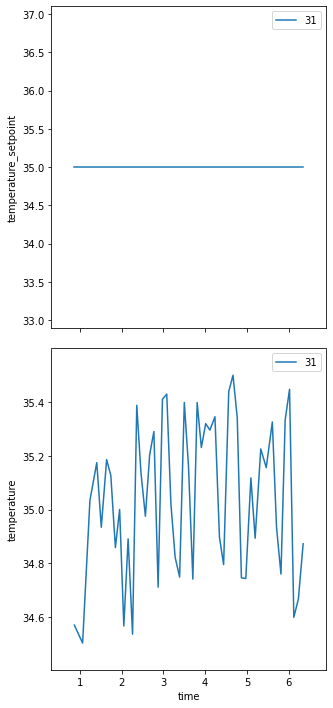

In [12]:
RE(bp.count([temperature], num=50, delay=0.1, md={"motive": "tscan"}))

## Get the data (from the database)
Let's get the measured data from the database now.  It's the most recent bluesky run, so an index of `-1` will identify it.

In [13]:
dataset = db.v2[-1].primary.read()

Let's get the values as a 1-D numpy array.

In [14]:
T = dataset["temperature"].values

## Compute the statistics
Use the methods of numpy arrays to compute maximum, mean, standard deviation, and minimum.  Looks nicer in a table.

In [15]:
table = pyRestTable.Table()
table.addLabel("measure")
table.addLabel("value")
table.addRow(("max", T.max()))
table.addRow(("mean", T.mean()))
table.addRow(("dev", T.std()))
table.addRow(("min", T.min()))
table.addRow(("#", len(T)))
print(table)

======= ==================
measure value             
======= ==================
max     35.499786373693446
mean    35.0441544213016  
dev     0.2852291758516404
min     34.503372243839166
#       50                
======= ==================



Let's replot that data for comparison.

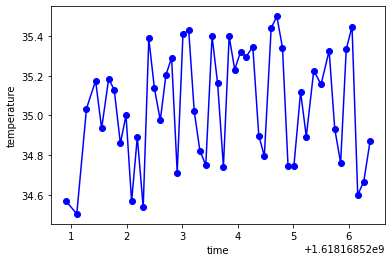

In [16]:
dataset["temperature"].plot(marker="o", color="blue")

## Challenges

Try these additional modifications or activities.

1. Scan using the temperature as a positioner (`bp.scan()`)
2. Record temperature values as an additional data stream during a scan.